# KMean Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans  

In [2]:
data = pd.read_csv('sum_data.csv')
data.head()

,index,reviewerID,productID,reviewText,rating,helpful,time,helped,unhelped,sum_helped
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,"[0, 0]","06 2, 2013",0,0,0
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,"[0, 0]","04 27, 2014",0,0,0
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,"[0, 0]","08 31, 2013",0,0,0
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,"[0, 0]","05 4, 2014",0,0,0
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,"[0, 0]","07 11, 2014",0,0,0


In [3]:
print("Helpful:", data[data.sum_helped > 0].shape[0])
print("Unhelpful:", data[data.sum_helped < 0].shape[0])
print("Normal:", data[data.sum_helped == 0].shape[0])
print("Ratio of unhelpful comment", data[data.sum_helped < 0].shape[0]/data.shape[0])

Helpful: 538421
Unhelpful: 130465
Normal: 1020302
Ratio of unhelpful comment 0.0772353343736754


In [19]:
# drop non positive or negative comment
data = data.drop(data[(data.helped == 0) & (data.unhelped == 0)].index)
data.head()

,index,reviewerID,productID,reviewText,rating,helpful,time,helped,unhelped,sum_helped
6,6,96319,0594481813,I lost my B&N original cable. I looked around...,5.0,"[2, 2]","03 9, 2014",2,0,2
7,7,83723,0594481813,"Go to Target or Barnes and Noble instead, and ...",3.0,"[3, 5]","09 18, 2013",3,2,1
8,8,108904,0594481813,"Works well, a little pricey I think for a char...",4.0,"[2, 2]","06 27, 2013",2,0,2
10,10,97870,0594481813,This item is just as was described in the orig...,4.0,"[2, 2]","04 16, 2014",2,0,2
11,11,59263,0972683275,This wall mount does everything it's supposed ...,4.0,"[3, 4]","08 30, 2010",3,1,2


In [6]:
df = data.groupby(['reviewerID']).agg({'sum_helped': 'mean'})
count = data.groupby(['reviewerID']).size().to_frame('count')
df = pd.merge(df, count, on='reviewerID').reset_index()
df.sort_values('count', ascending=False)

,reviewerID,sum_helped,count
37549,42480,25.918750,320
91015,100074,23.505300,283
93404,102648,9.818182,264
97186,106722,71.893130,262
82079,90461,23.768340,259
124884,136670,7.824268,239
80987,89290,8.566964,224
106724,116971,15.942857,210
113305,124071,69.041667,192
66988,74198,12.102703,185


In [21]:
top1000 = df.sort_values('count', ascending=False)[:1000]
top1000.head()

,reviewerID,sum_helped,count
37549,42480,25.918750,320
91015,100074,23.505300,283
93404,102648,9.818182,264
97186,106722,71.893130,262
82079,90461,23.768340,259


In [ ]:
# q1 = np.percentile(df2['sum_helped'],25)
# q3 = np.percentile(df2['sum_helped'],75)
# iqr = q3-q1
# df = df.drop(df[(df['sum_helped'] < (q1 - (1.5*iqr))) | (df['sum_helped'] > (q3 + (1.5*iqr)))].index)
# print(q1)
# print(q3)

In [22]:
X = []
for index, i in df2.iterrows():
    arr = np.array([i['count'], i['sum_helped']])
    X.append(arr)
X = np.array(X)
X


array([[320.        ,  25.91875   ],
       [283.        ,  23.50530035],
       [264.        ,   9.81818182],
       ...,
       [ 30.        ,  19.13333333],
       [ 30.        ,  23.53333333],
       [ 30.        ,   9.63333333]])

In [43]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
centroids = kmeans.cluster_centers_
print(kmeans.cluster_centers_)  

[[ 41.45961003   8.58358289]
 [179.82857143  22.72811715]
 [ 45.56521739  61.62360782]
 [ 85.78651685  13.15975442]]


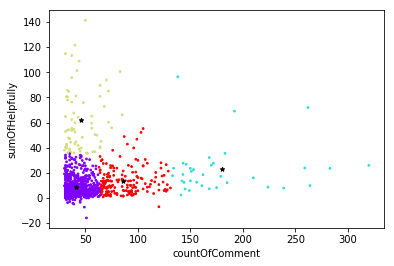

In [45]:
fig,ax = plt.subplots()
plt.xlabel('countOfComment')
plt.ylabel('sumOfHelpfully')
ax.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow', s=3)  
ax.scatter(centroids[:,0],centroids[:,1], marker = '*', c = '#050505' ,s=20)